In [114]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from scipy.stats import zscore

# # 1. Đọc dữ liệu từ file JSON
# df = pd.read_json("dataset/data1.json")


# # 2. Thống kê các thuộc tính của dữ liệu
# df.describe(include='all')


# # 3. Xử lý dữ liệu khuyết thiếu
# cols_with_missing = df.columns[df.isnull().any()]
# print(f"Các cột có giá trị khuyết thiếu: {cols_with_missing}")
# # df = df.dropna()  # Xóa các bản ghi có giá trị khuyết thiếu


# # 4. Chuẩn hóa dữ liệu
# # Tách trường measurements thành 3 trường riêng
# df[['Length', 'Width', 'Height']] = df['Measurements'].str[:-2].str.split('x', expand=True).astype(float)
# df['Measurements'] = None

# # Chuyển đổi các thuộc tính định tính thành định lượng
# df['Cut'] = df['Cut'].astype('category').cat.set_categories(['Excellent', 'Very Good', 'Good']).cat.codes                           # Excellent -> 0, Very Good -> 1, Good ->2
# df['Color'] = df['Color'].astype('category').cat.set_categories(['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']).cat.codes                 # D->0, E->1, F->2, G->3, H->4, I->5, J->6, K->7
# df['Clarity'] = df['Clarity'].astype('category').cat.set_categories(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2']).cat.codes   # IF->0, VVS1->1, VVS2->2, VS1->3, VS2->4, SI1->5, SI2->6
# df['Fluorescence'] = df['Fluorescence'].astype('category').cat.set_categories(['None', 'Faint', 'Medium', 'Strong']).cat.codes      # None->0, Faint->1, Medium->2, Strong->3
# df['Symmetry'] = df['Symmetry'].astype('category').cat.set_categories(['Excellent', 'Very Good', 'Good']).cat.codes                 # Excellent -> 0, Very Good -> 1, Good ->2

# # Chuyển đổi các cột Length, Width, Height sang kiểu số sau khi đã tách
# df[['Length', 'Width', 'Height']] = df[['Length', 'Width', 'Height']].astype(float)

# # Chuẩn hóa các giá trị số
# scaler = StandardScaler()
# df[['Carat Weight', 'Length/Width Ratio', 'Depth %', 'Table %']] = scaler.fit_transform(df[['Carat Weight', 'Length/Width Ratio', 'Depth %', 'Table %']])

# # Thêm 3 trường này vào bảng dataframe
# df = df[['Shape', 'Cut', 'Color', 'Clarity', 'Fluorescence', 'Symmetry', 'Girdle', 'Certificate', 'Length', 'Width', 'Height']]


# # 5. Xử lý dữ liệu ngoại lệ
# # Xác định các ngoại lệ
# df.boxplot()
# plt.show()

# # Xác định các ngoại lệ
# for col in df.select_dtypes(include=[np.number]):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     upper_bound = q3 + 3 * iqr
#     lower_bound = q1 - 3 * iqr
#     df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# # Xóa các bản ghi có giá trị khuyết thiếu
# df = df.dropna()


# # 6. Lưu trữ dữ liệu đã xử lý
# df.to_json("processed.json", index=False)


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

data = pd.read_json("dataset/data1.json")
data.head()

,Shape,Cut,Color,Clarity,Carat Weight,Fluorescence,Length/Width Ratio,Depth %,Table %,Symmetry,Girdle,Culet,Measurements,Certificate,Width,Height,Length
0,Round,Excellent,I,VS2,3.41,None,1.00,62.1,59,Excellent,Medium to Slightly Thick,None,9.55x9.59x5.94 mm,GIA,9.55,9.59,5.94
1,Round,Excellent,I,VS2,3.61,Medium,1.01,61.3,59,Excellent,Medium to Slightly Thick,None,9.84x9.89x6.05 mm,GIA,9.84,9.89,6.05
2,Round,Excellent,J,VVS1,3.41,None,1.01,61.2,60,Excellent,Medium to Slightly Thick,None,9.64x9.7x5.91 mm,GIA,9.64,9.70,5.91
3,Round,Excellent,J,VVS2,3.27,Medium,1.00,62.1,57,Excellent,Medium to Slightly Thick,None,9.43x9.46x5.87 mm,GIA,9.43,9.46,5.87
4,Round,Excellent,F,VS1,3.59,None,1.01,59.1,59,Excellent,Thin to Medium,None,10.04x10.1x5.95 mm,GIA,10.04,10.10,5.95


In [132]:

# data.drop('Color', axis=1, inplace=True)

In [158]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               5008 non-null   object 
 1   Cut                 5008 non-null   object 
 2   Color               5008 non-null   object 
 3   Clarity             5008 non-null   object 
 4   Carat Weight        5008 non-null   float64
 5   Fluorescence        5008 non-null   object 
 6   Length/Width Ratio  5008 non-null   float64
 7   Depth %             5008 non-null   float64
 8   Table %             5008 non-null   int64  
 9   Symmetry            5008 non-null   object 
 10  Girdle              5008 non-null   object 
 11  Culet               5008 non-null   object 
 12  Measurements        5008 non-null   object 
 13  Certificate         5008 non-null   object 
 14  Width               5008 non-null   float64
 15  Height              5008 non-null   float64
 16  Length

In [159]:
data.isnull().sum()

Shape                 0
Cut                   0
Color                 0
Clarity               0
Carat Weight          0
Fluorescence          0
Length/Width Ratio    0
Depth %               0
Table %               0
Symmetry              0
Girdle                0
Culet                 0
Measurements          0
Certificate           0
Width                 0
Height                0
Length                0
dtype: int64

In [160]:
data.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Width,Height,Length
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000
mean,2.302522,1.006941,61.998383,58.020168,7.883237,7.928808,4.898205
std,1.399576,0.004820,1.253763,1.849919,2.188421,2.199224,1.349020
min,0.200000,1.000000,57.700000,52.000000,3.730000,3.750000,2.250000
25%,0.730000,1.000000,61.400000,57.000000,5.650000,5.690000,3.570000
50%,2.710000,1.010000,62.300000,58.000000,8.900000,8.960000,5.520000
75%,3.400000,1.010000,62.700000,59.000000,9.580000,9.630000,5.930000
max,5.000000,1.030000,64.900000,68.000000,11.080000,11.260000,6.820000


In [161]:
num_cols = data.select_dtypes('number')
cat_cols = data.select_dtypes('O')
for c in cat_cols.columns:
    print(cat_cols[c].unique())

['Round']
['Excellent' 'Very Good' 'Good']
['I' 'J' 'F' 'E' 'H' 'K' 'G' 'D']
['VS2' 'VVS1' 'VVS2' 'VS1' 'SI1' 'IF' 'SI2' 'FL']
['None' 'Medium' 'Faint' 'Strong']
['Excellent' 'Very Good' 'Good']
['Medium to Slightly Thick' 'Thin to Medium' 'Medium'
 'Thin to Slightly Thick' 'Slightly Thick' 'Thin to Thick'
 'Slightly Thick to Thick' 'Medium to Thick' 'Thick to Very Thick'
 'Slightly Thick to Very Thick' 'Very Thin to Slightly Thick'
 'Very Thin to Medium' 'Thick' 'Very Thin to Thick'
 'Extremely Thin to Medium' 'Thin' 'Medium to Very Thick'
 'Extremely Thin to Thick' 'Thin to Very Thick' 'Very Thick'
 'Very Thin to Thin']
['None' 'Very Small' 'Small' 'Medium']
['9.55x9.59x5.94 mm' '9.84x9.89x6.05 mm' '9.64x9.7x5.91 mm' ...
 '8.79x8.8x5.28 mm' '8.6x8.67x5.41 mm' '8.64x8.69x5.41 mm']
['GIA ']


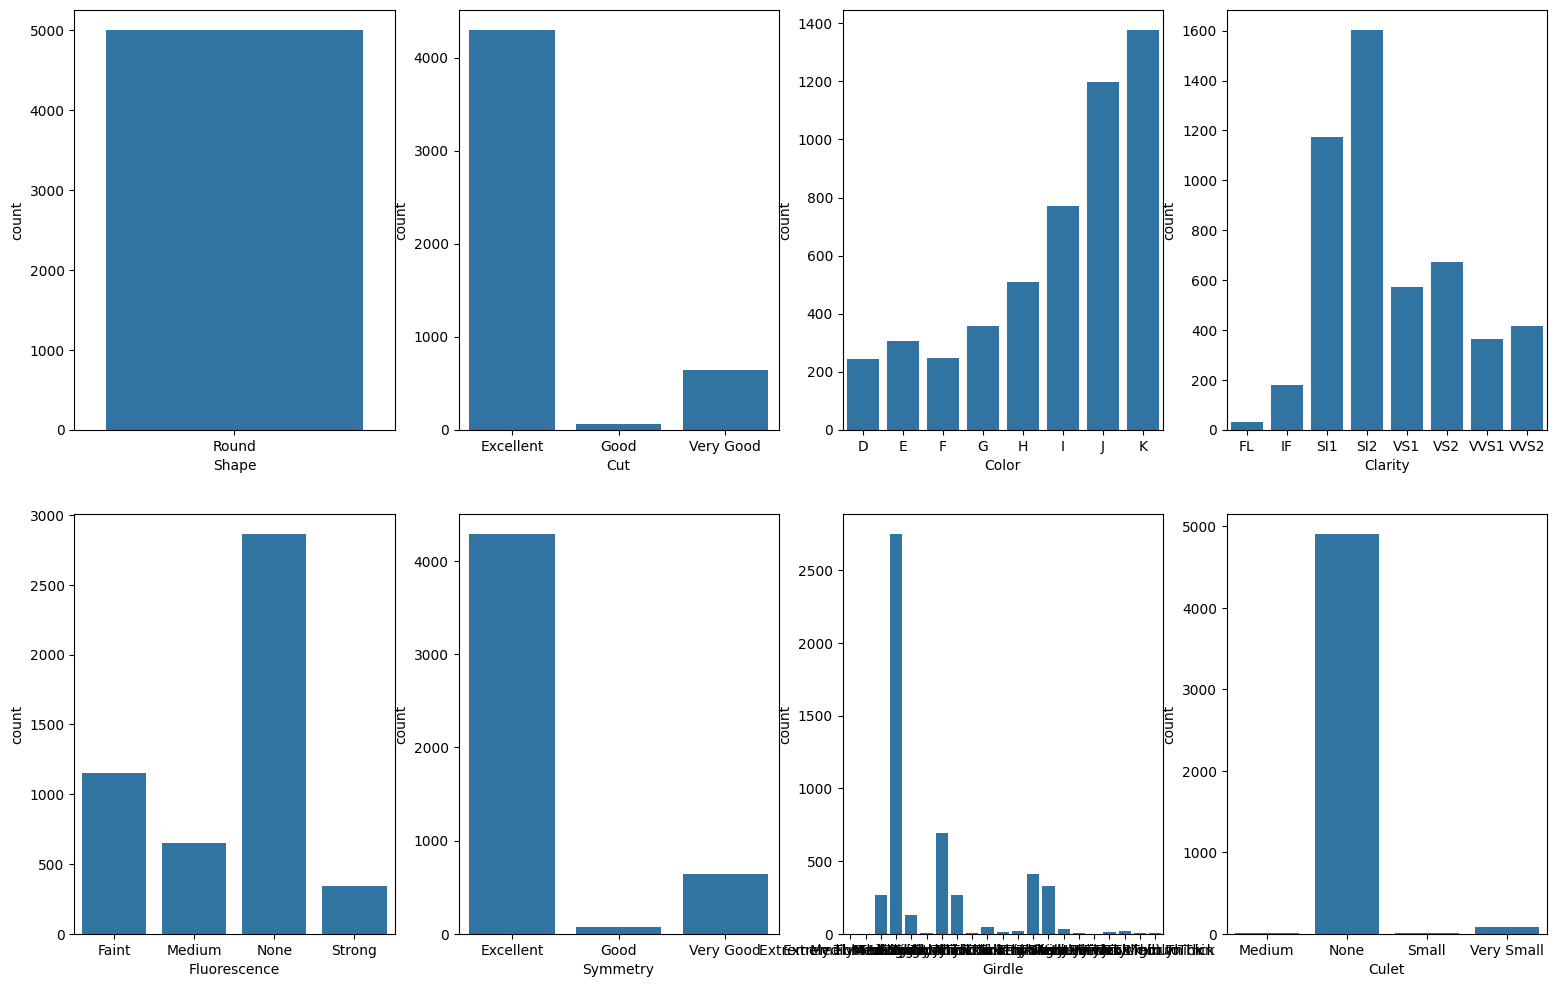

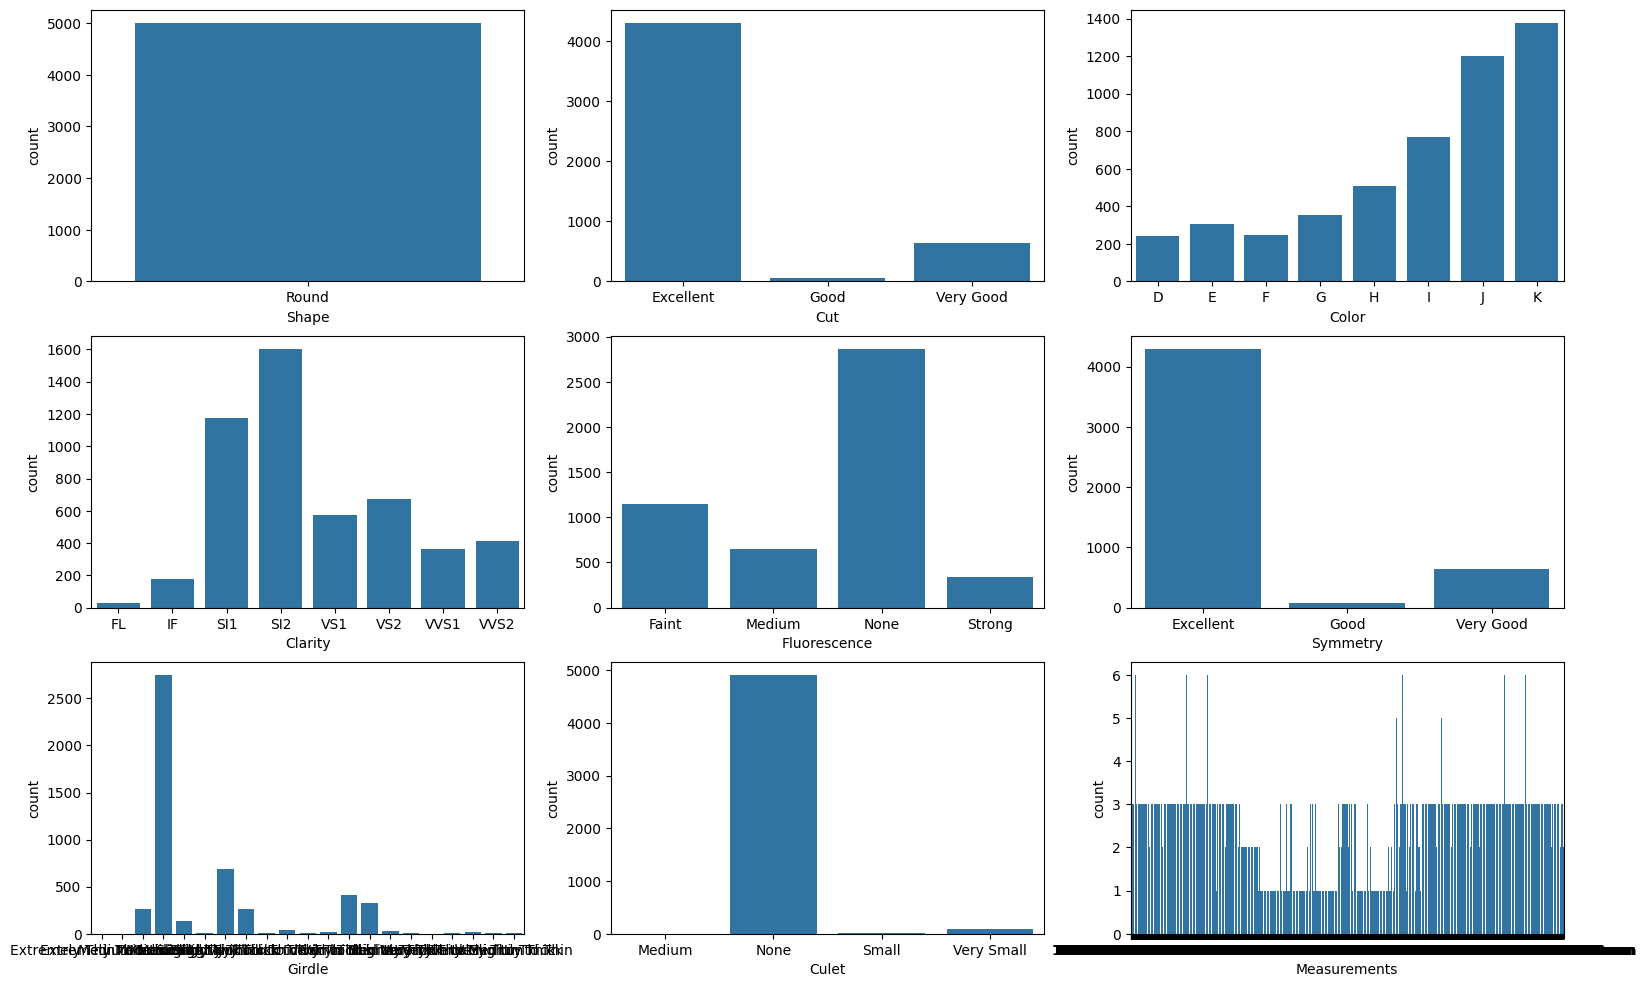

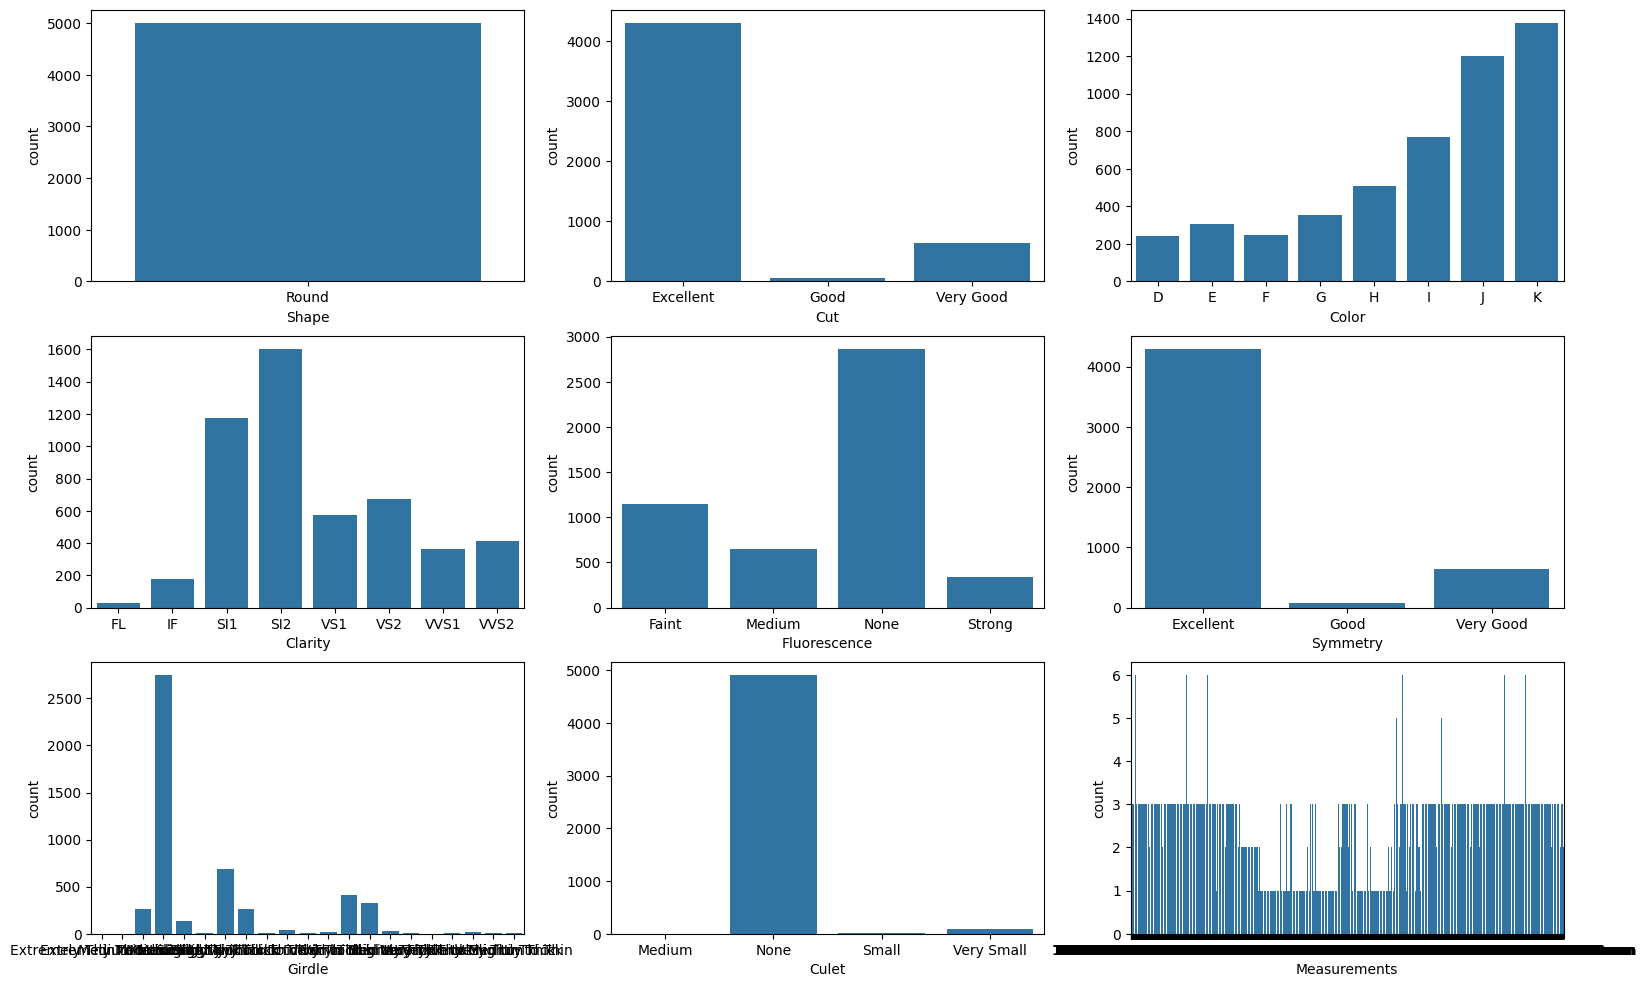

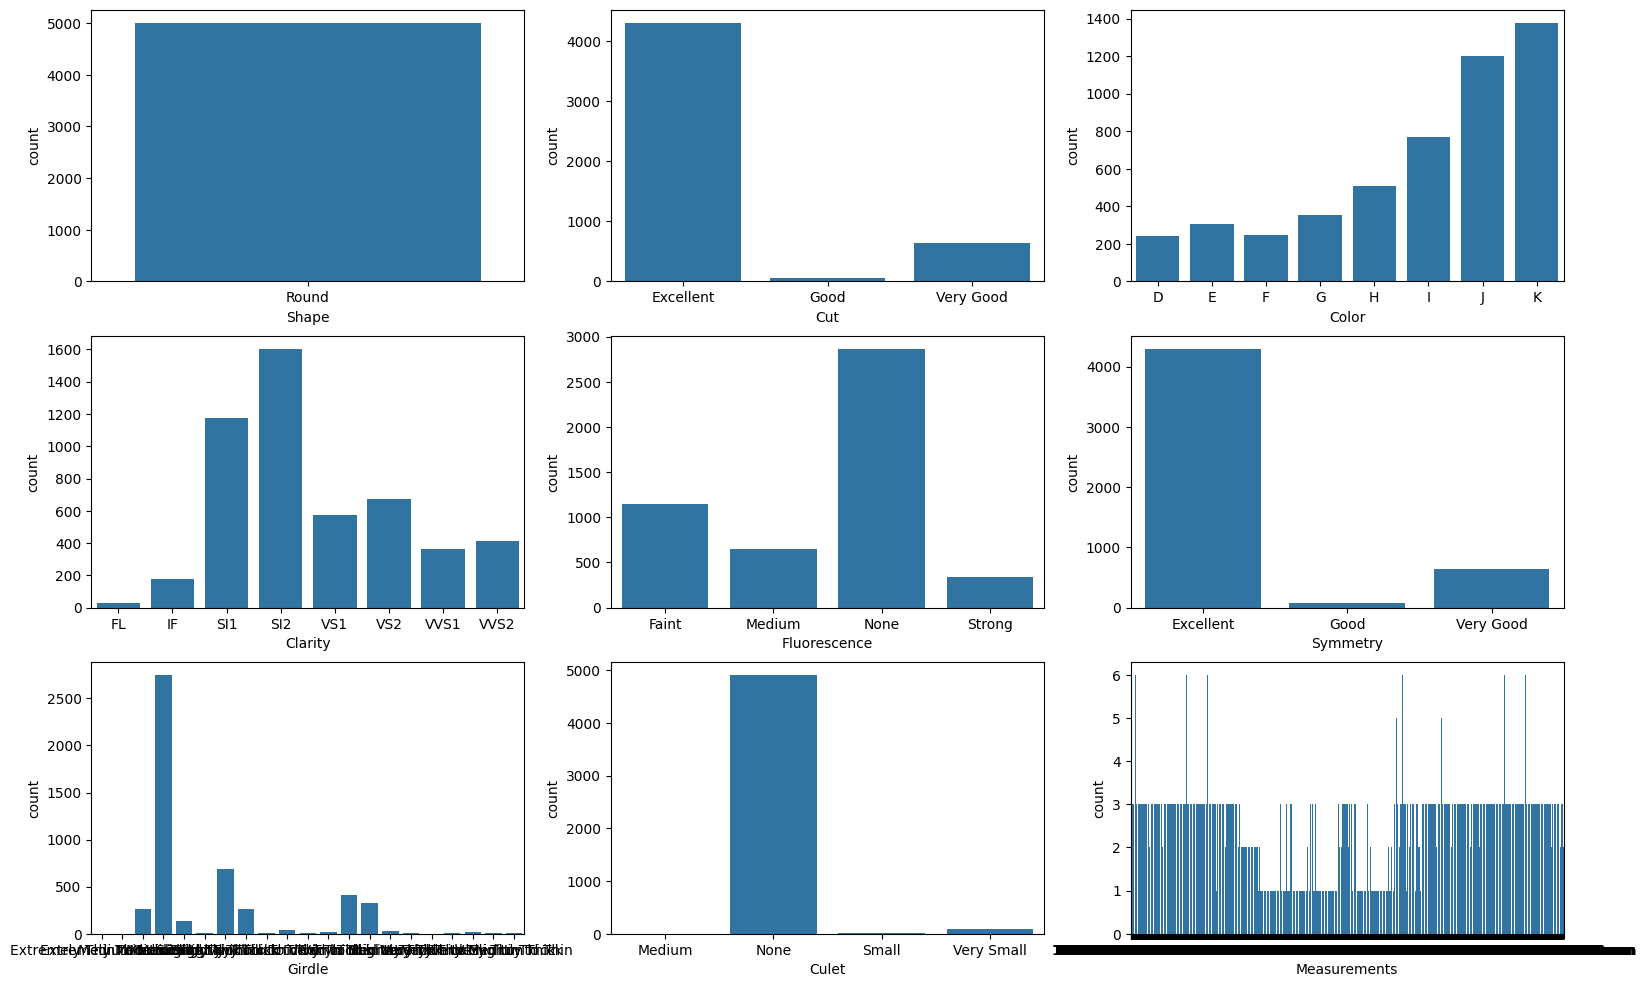

In [165]:
i = 1
plt.figure(figsize=(19, 12))
for c in cat_cols.columns[:9]:
    plt.subplot(3, 3, i)
    sns.countplot(x=data[c].sort_values())
    i+=1

plt.show()

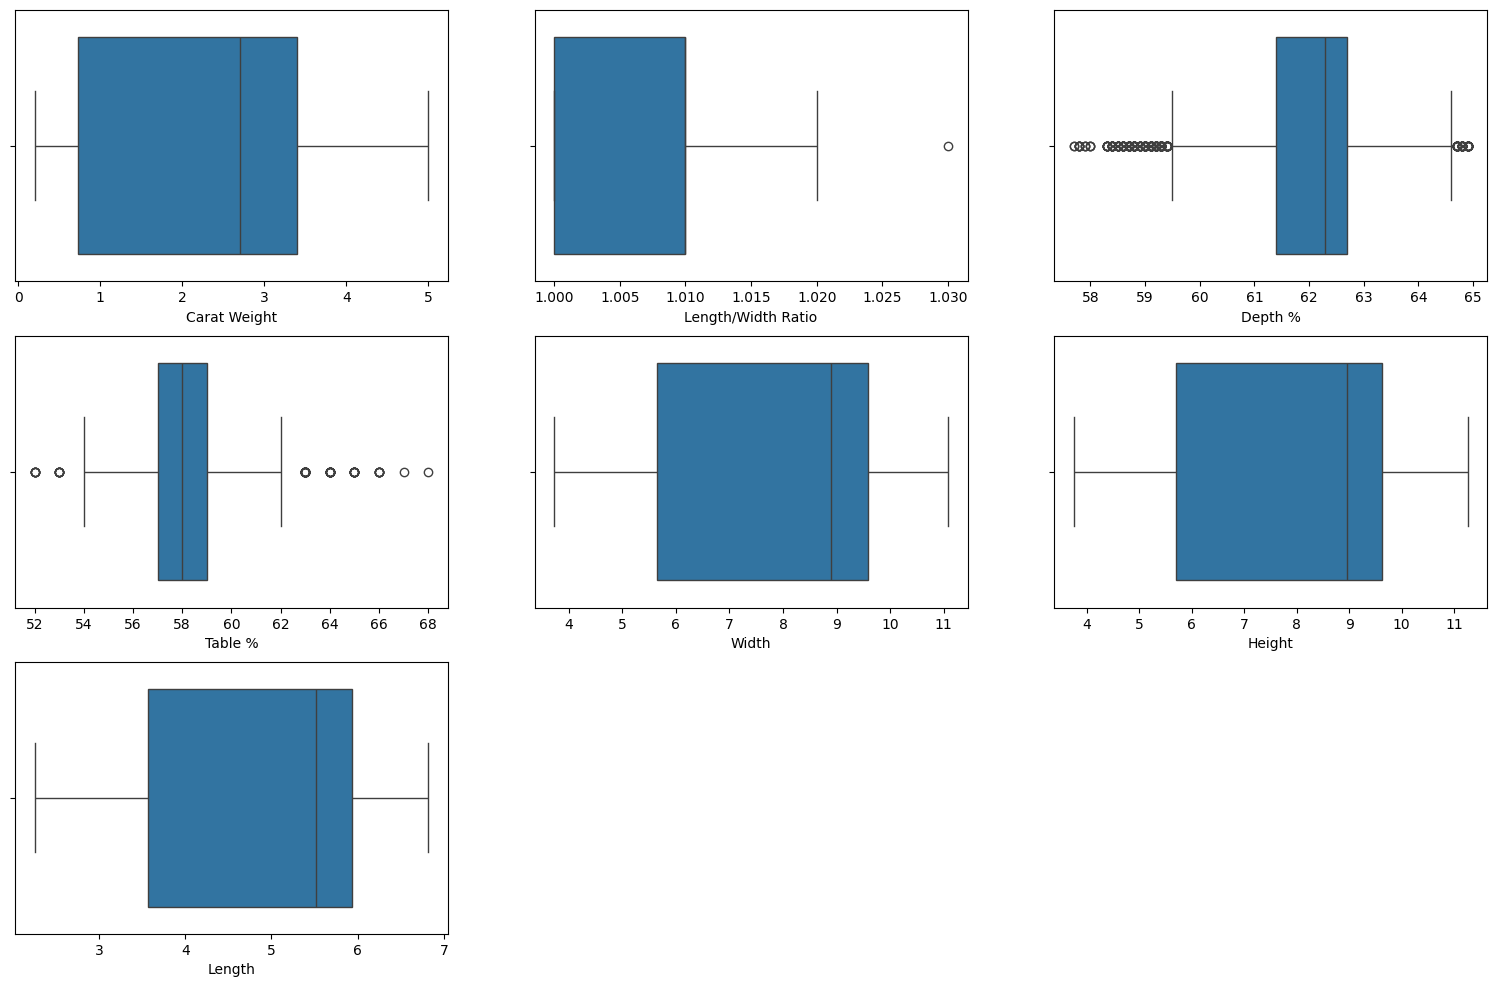

In [166]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

plt.show()

In [167]:
data = data[(np.abs(stats.zscore(num_cols)) < 3).all(axis=1)]

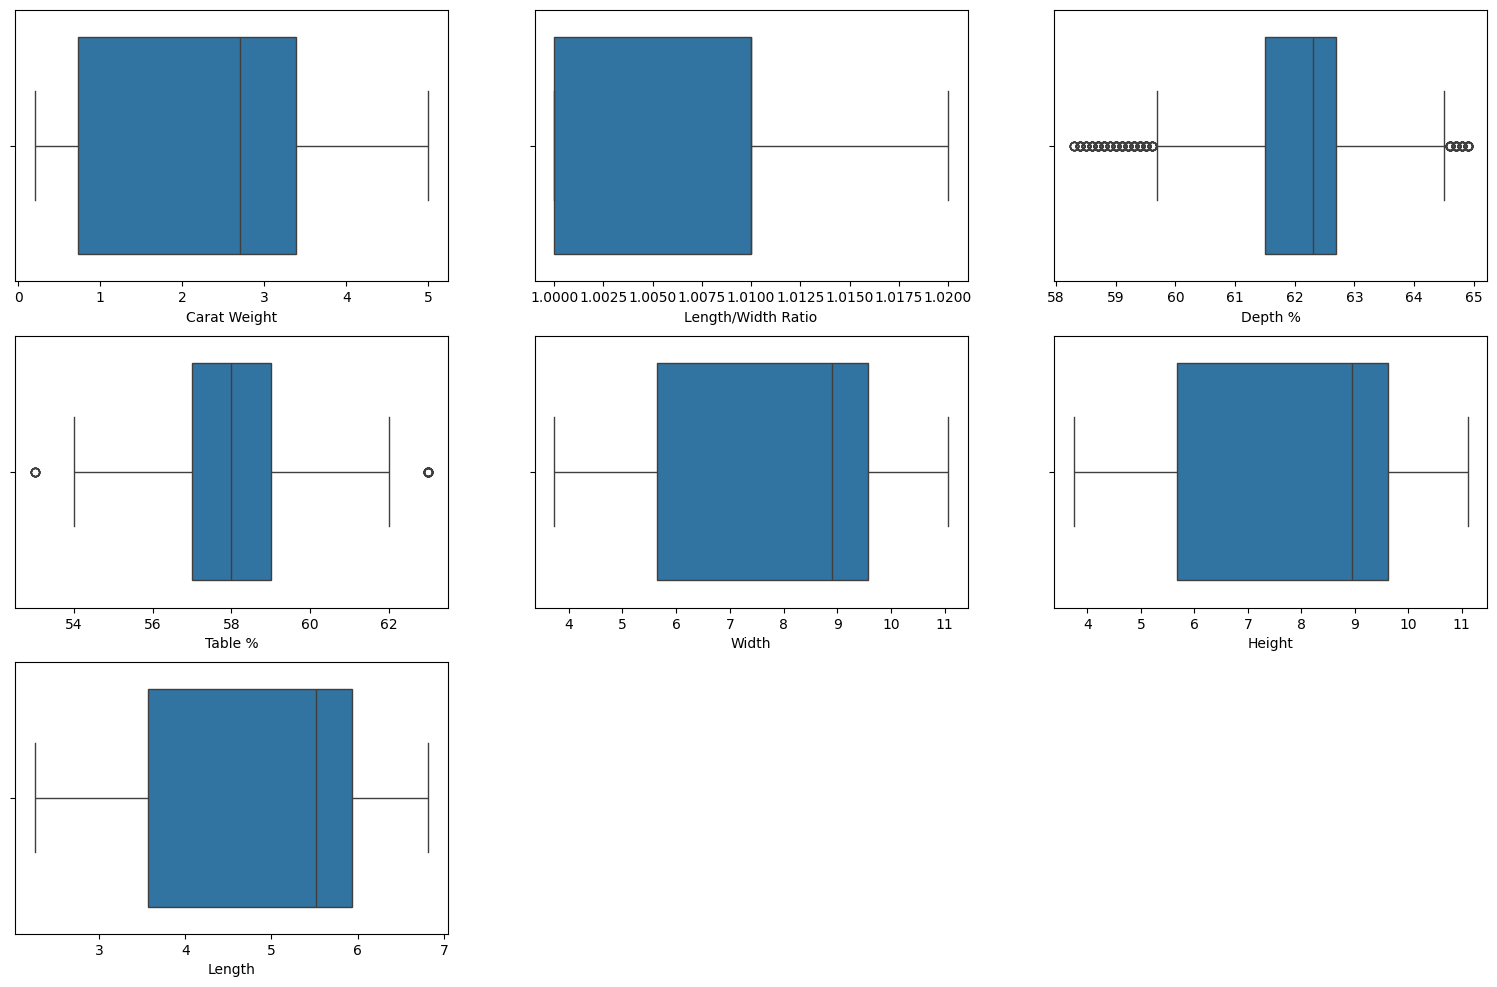

In [168]:
num_cols = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

plt.show()

In [169]:
data['table_xy'] = (data['Table %'].mean()*(data['x']*data['y']).mean()-data['Table %']*(data['x']*data['y']))
data['depth_z'] = (data['Depth %'].mean()*data['z'].mean()-data['Depth %']*data['z'])

KeyError: 'x'

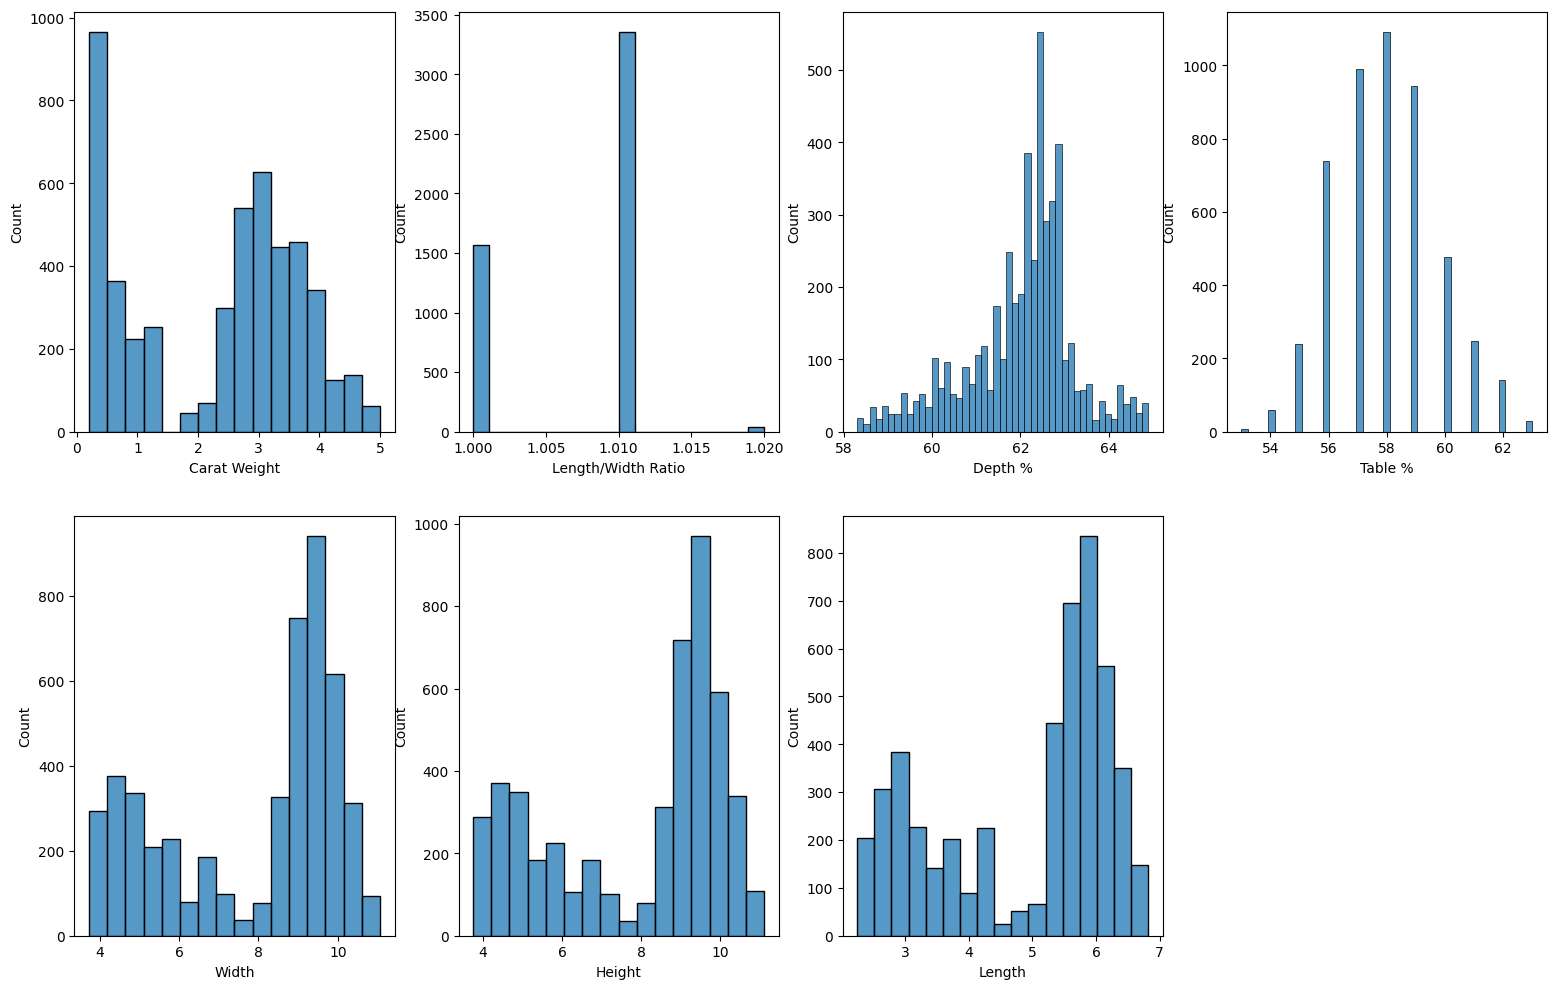

In [170]:
num_cols = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(2, 4, i)
    sns.histplot(x = data[c])
    i+=1

plt.show()

In [171]:
data['Cut'] = data['Cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
data['Color'] = data['Color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
data['Clarity'] = data['Clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

In [174]:
i = 1
plt.figure(figsize=(19, 16))
for c in data.columns:
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[c], y=data['price'])
    i+=1

plt.show()

KeyError: 'price'